In [1]:
#Description:This program uses the three moving average crossover strategu to determine when to buy and sell stock
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
#load the data
df=yf.Ticker('TSLA').history(start='2019-11-18',end='2022-8-15')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-18,70.584000,70.629997,69.220001,69.998001,22002000,0,0.0
2019-11-19,70.349998,71.998001,69.559998,71.903999,38624000,0,0.0
2019-11-20,72.000000,72.239998,69.914001,70.444000,33625500,0,0.0
2019-11-21,70.902000,72.167999,70.800003,70.966003,30550000,0,0.0
2019-11-22,68.031998,68.199997,66.000000,66.608002,84353000,0,0.0
...,...,...,...,...,...,...,...
2022-08-08,885.000000,915.599976,867.260010,871.270020,32998000,0,0.0
2022-08-09,870.880005,877.190002,838.059998,850.000000,28748200,0,0.0
2022-08-10,891.200012,892.530029,850.109985,883.070007,31639600,0,0.0


In [3]:
#Calculate the three moving average
#Calculate the short/fast exponential moving average
ShortEMA=df.Close.ewm(span=5,adjust=False).mean()
#Calculate the Middle/Medium exponentail moving average
MiddleEMA=df.Close.ewm(span=21,adjust=False).mean()
#Calculate the long/slow exponential moving average
LongEMA=df.Close.ewm(span=63,adjust=False).mean()

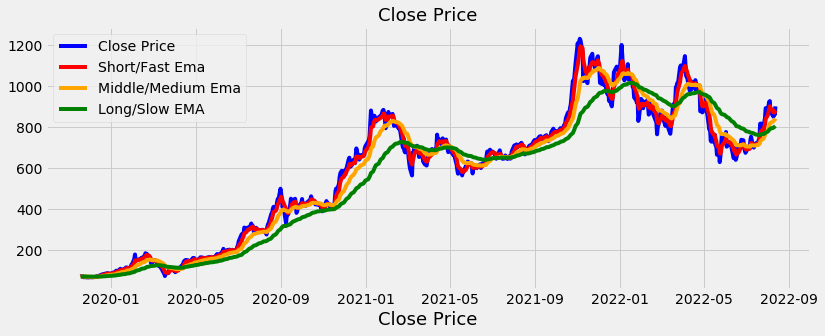

In [4]:
#Visualize the Closing price and the exponentail moving averages
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price',fontsize=18)
plt.plot(df['Close'],label='Close Price',color='blue')
plt.plot(ShortEMA,label='Short/Fast Ema',color='red')
plt.plot(MiddleEMA,label='Middle/Medium Ema',color='orange')
plt.plot(LongEMA,label='Long/Slow EMA',color='green')
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price', fontsize=18)
plt.legend()
plt.show()

In [5]:
df['Short']=ShortEMA
df['Middle']=MiddleEMA
df['Long']=LongEMA

In [6]:
#Show the data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Short,Middle,Long
Date,,,,,,,,,,
2019-11-18,70.584000,70.629997,69.220001,69.998001,22002000,0,0.0,69.998001,69.998001,69.998001
2019-11-19,70.349998,71.998001,69.559998,71.903999,38624000,0,0.0,70.633334,70.171274,70.057564
2019-11-20,72.000000,72.239998,69.914001,70.444000,33625500,0,0.0,70.570223,70.196067,70.069640
2019-11-21,70.902000,72.167999,70.800003,70.966003,30550000,0,0.0,70.702150,70.266061,70.097651
2019-11-22,68.031998,68.199997,66.000000,66.608002,84353000,0,0.0,69.337434,69.933510,69.988600
...,...,...,...,...,...,...,...,...,...,...
2022-08-08,885.000000,915.599976,867.260010,871.270020,32998000,0,0.0,882.941289,824.860879,794.405274
2022-08-09,870.880005,877.190002,838.059998,850.000000,28748200,0,0.0,871.960860,827.146254,796.142609
2022-08-10,891.200012,892.530029,850.109985,883.070007,31639600,0,0.0,875.663909,832.230232,798.859090


In [7]:
def buy_sell_function(data):
    buy_list=[]
    sell_list=[]
    flag_long=False
    flag_short=False
    for i in range (0,len(data)):
        #print(data['Middle'][i])
        if data['Middle'][i]<data['Long'][i] and data['Short'][i]<data['Middle'][i] and flag_long==False and flag_short==False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short=True
            
        elif flag_short==True and data['Short'][i]>data['Middle'][i]:
            buy_list.append(np.nan)
            sell_list.append(data['Close'][i])
            flag_short=False
            
        elif data['Middle'][i]>data['Long'][i] and data['Short'][i]>data['Middle'][i] and flag_long==False and flag_short==False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long=True
            
        elif flag_long==True and data['Short'][i]<data['Middle'][i]:
            buy_list.append(np.nan)
            sell_list.append(data['Close'][i])
            flag_long=False
            
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)


            

    return(buy_list,sell_list)

In [8]:
df['Buy']=buy_sell_function(df)[0]
df['Sell']=buy_sell_function(df)[1]
df[1:10]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Short,Middle,Long,Buy,Sell
Date,,,,,,,,,,,,
2019-11-19,70.349998,71.998001,69.559998,71.903999,38624000,0,0.0,70.633334,70.171274,70.057564,71.903999,NaN
2019-11-20,72.000000,72.239998,69.914001,70.444000,33625500,0,0.0,70.570223,70.196067,70.069640,NaN,NaN
2019-11-21,70.902000,72.167999,70.800003,70.966003,30550000,0,0.0,70.702150,70.266061,70.097651,NaN,NaN
2019-11-22,68.031998,68.199997,66.000000,66.608002,84353000,0,0.0,69.337434,69.933510,69.988600,NaN,66.608002
2019-11-25,68.863998,68.914001,66.891998,67.267998,61697500,0,0.0,68.647622,69.691191,69.903581,67.267998,NaN
2019-11-26,67.054001,67.099998,65.419998,65.783997,39737000,0,0.0,67.693080,69.335992,69.774844,NaN,NaN
2019-11-27,66.223999,66.786003,65.713997,66.258003,27778000,0,0.0,67.214721,69.056174,69.664942,NaN,NaN
2019-11-29,66.222000,66.251999,65.500000,65.987999,12328000,0,0.0,66.805814,68.777249,69.550038,NaN,NaN
2019-12-02,65.879997,67.276001,65.737999,66.973999,30372500,0,0.0,66.861875,68.613318,69.469537,NaN,NaN


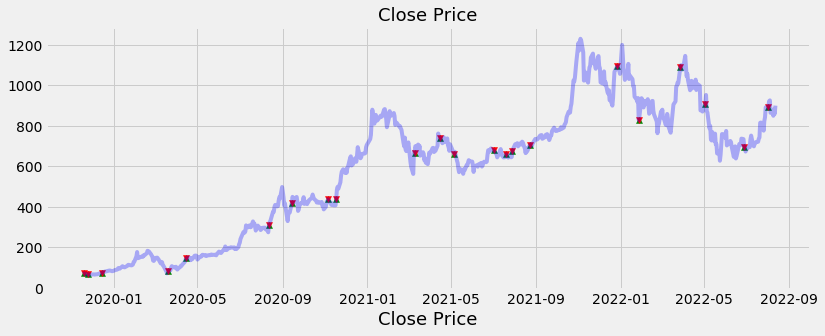

In [9]:
#Visualize the Closing price and the exponentail moving averages
df=df
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price',fontsize=18)
plt.plot(df['Close'],label='Close Price',color='blue',alpha=0.3)
plt.scatter(df.index,df['Buy'],label='Buy',color='green',marker='^',alpha=1)
plt.scatter(df.index,df['Buy'],label='Buy',color='red',marker='v',alpha=1)
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price', fontsize=18)
plt.show()

In [10]:
#my suggestion is buy when short middle both are below the long 